In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from utils import miscel_tool

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
train_2_path = 'web_traffic_data/train_2.csv'
df_train = pd.read_csv(train_2_path)
df_train = miscel_tool.split_page_underscore(df_train)
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,title,project,device,agent
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,16.0,27.0,29.0,23.0,54.0,38.0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,54.0,25.0,26.0,23.0,13.0,81.0,2PM,zh.wikipedia.org,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,3C,zh.wikipedia.org,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,6.0,16.0,19.0,30.0,38.0,4.0,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider


In [74]:
time_col = miscel_tool.extract_time_column_name(df_train)
time_col

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=803)

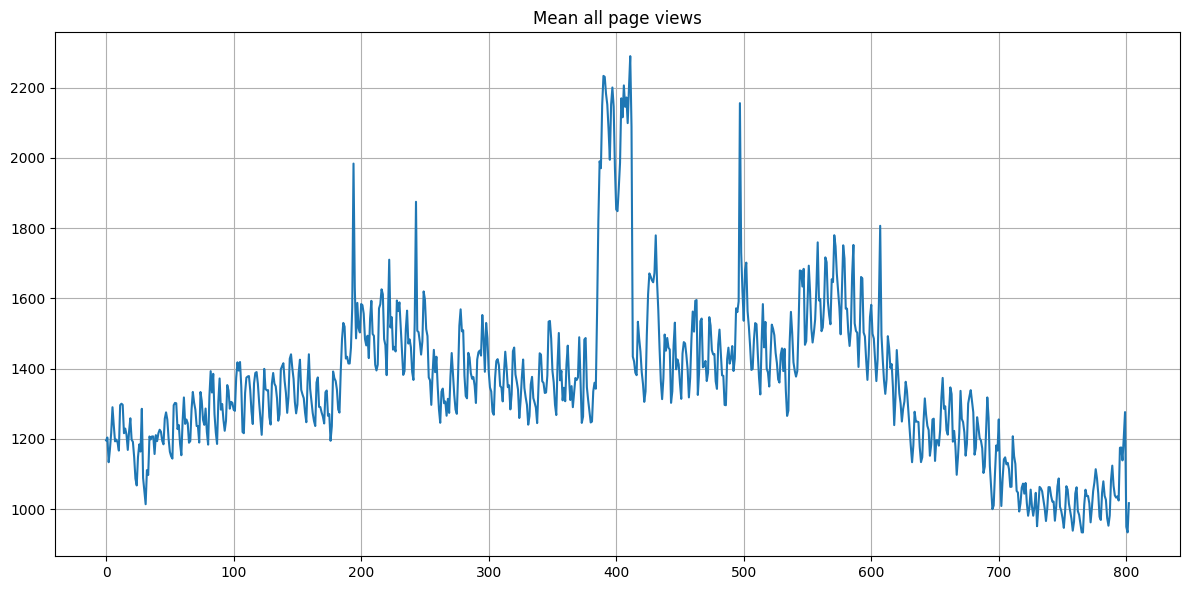

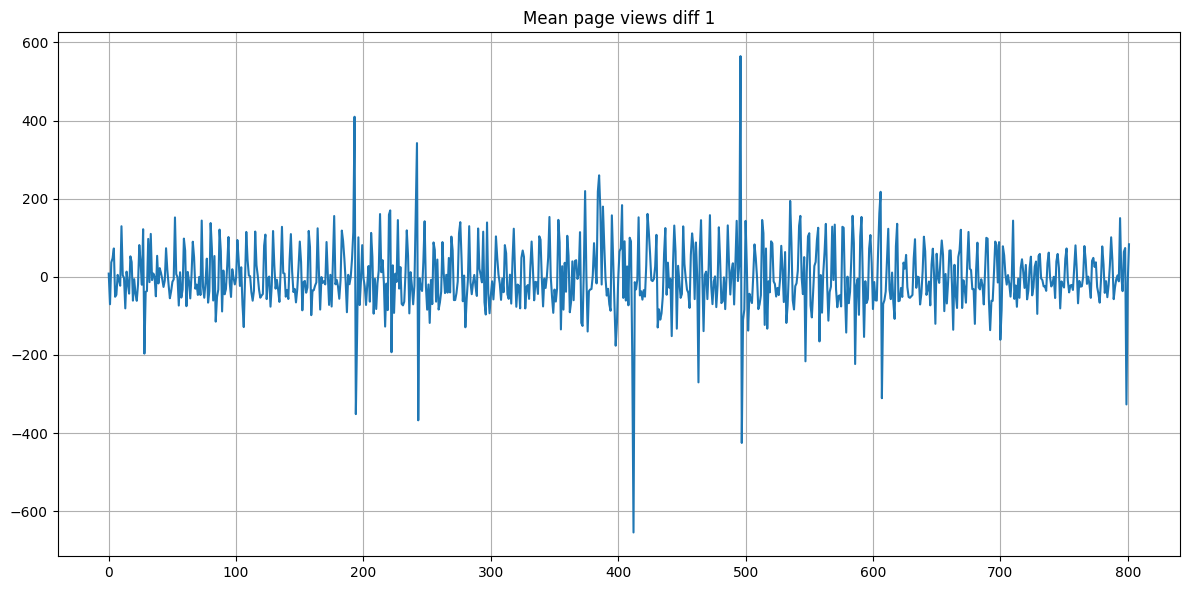

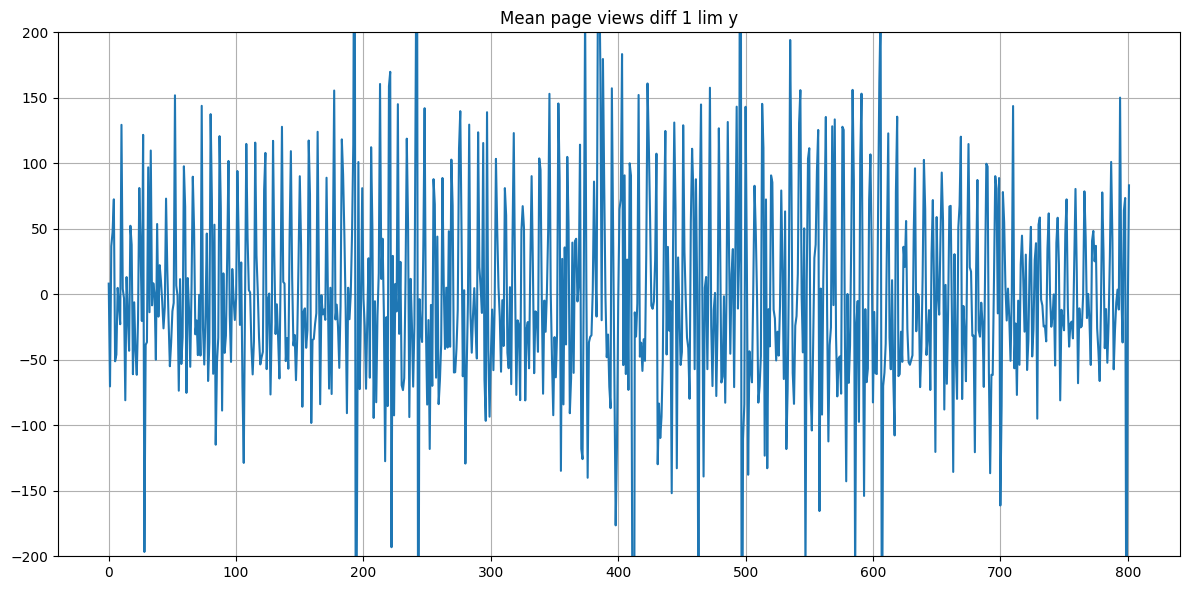

In [75]:
df_overall_mean = df_train[time_col].mean()
array_overall_mean = df_overall_mean.to_numpy()

plt.figure(figsize=(12, 6))
plt.plot(array_overall_mean)
plt.title('Mean all page views')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(array_overall_mean[1:] - array_overall_mean[:-1])
plt.title('Mean page views diff 1')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(array_overall_mean[1:] - array_overall_mean[:-1])
plt.title('Mean page views diff 1 lim y')
plt.ylim(-200, 200)
plt.grid()
plt.tight_layout()
plt.show()


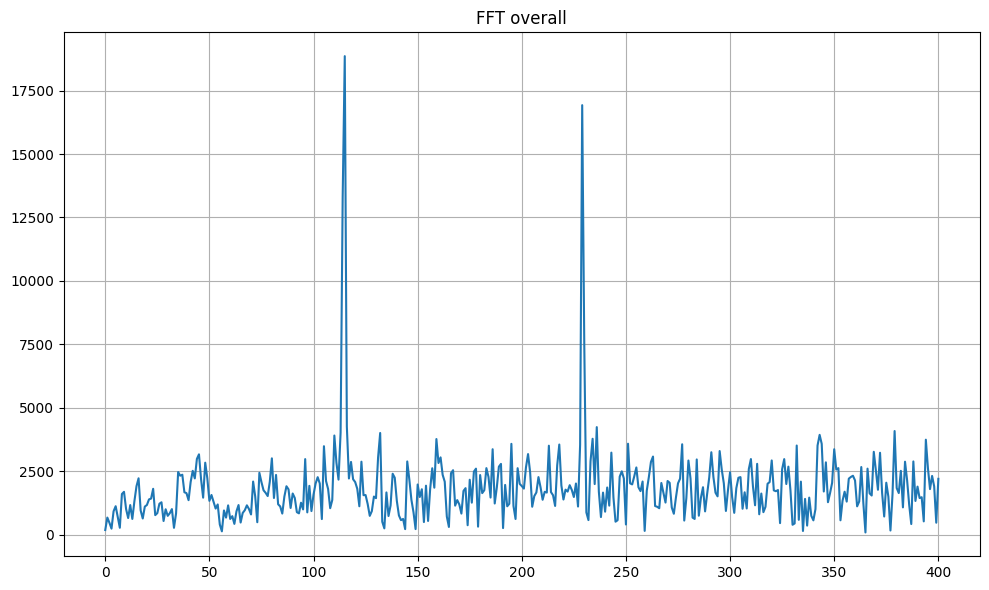

In [76]:
array_diff = array_overall_mean[1:] - array_overall_mean[:-1]
y_freq = abs(scipy.fft.fft(array_diff))

plt.figure(figsize=(10, 6))
plt.plot(y_freq[:len(y_freq) // 2]) 
plt.title('FFT overall')
plt.grid()
plt.tight_layout()
plt.show()

In [77]:
np.argsort(-y_freq[:len(y_freq) // 2])[:10]

array([115, 229, 114, 230, 116, 236, 379, 113, 132, 343])

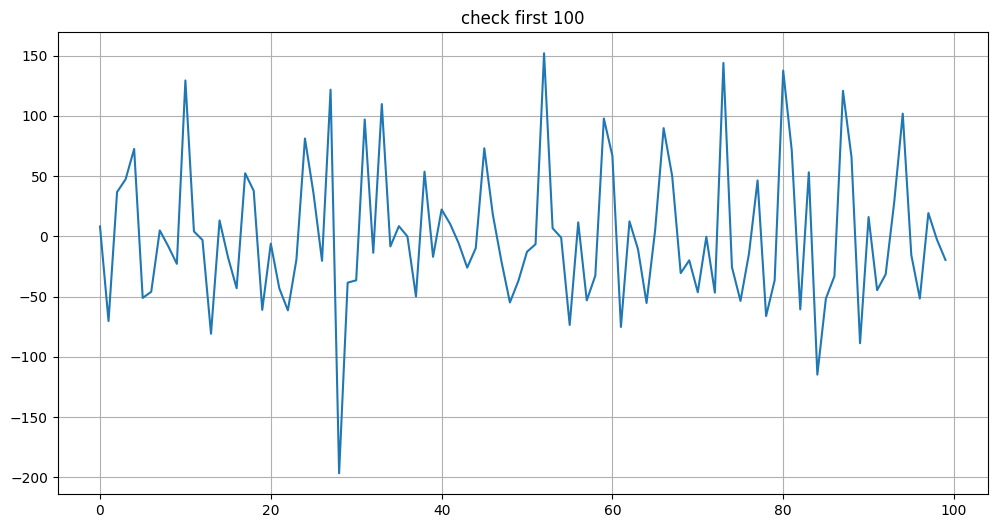

In [94]:
first_n = 100
plt.figure(figsize=(12, 6))
plt.plot(np.arange(first_n), array_diff[:first_n])
plt.title(f'check first {first_n}')
plt.grid()
plt.show()

# check language

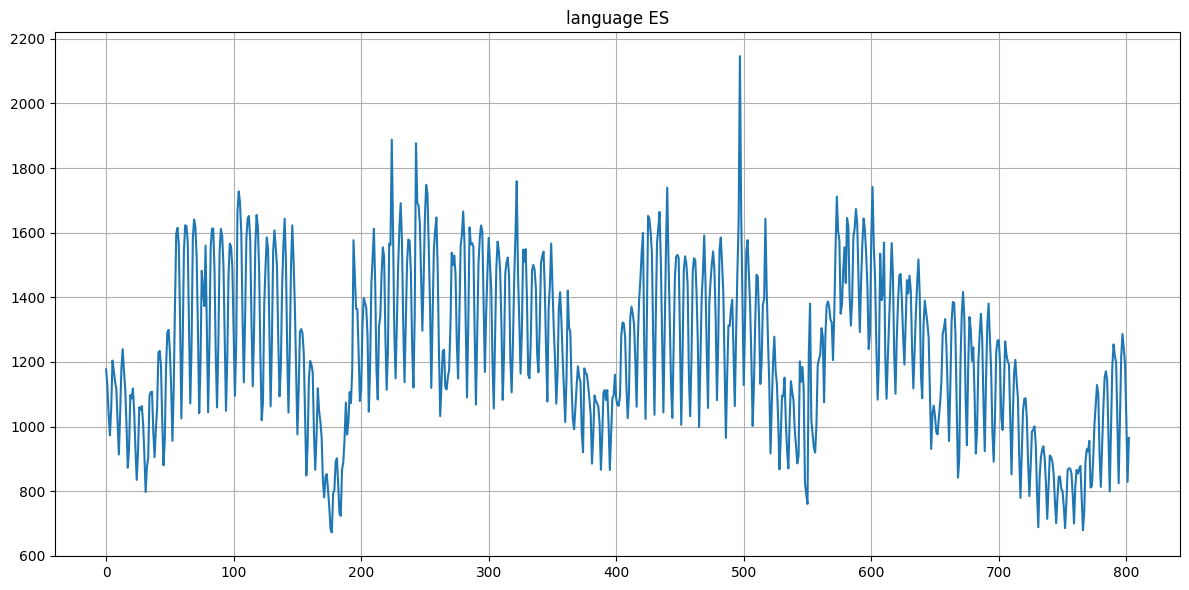

In [79]:
language_select = 'es'
mask_lang = df_train['project'].str.contains(language_select + '\.')
time_col = miscel_tool.extract_time_column_name(df_train)
df_mean_lang = df_train.loc[mask_lang, time_col].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_mean_lang.to_numpy())
plt.title(f"language {language_select.upper()}")
plt.grid()
plt.tight_layout()
plt.show()

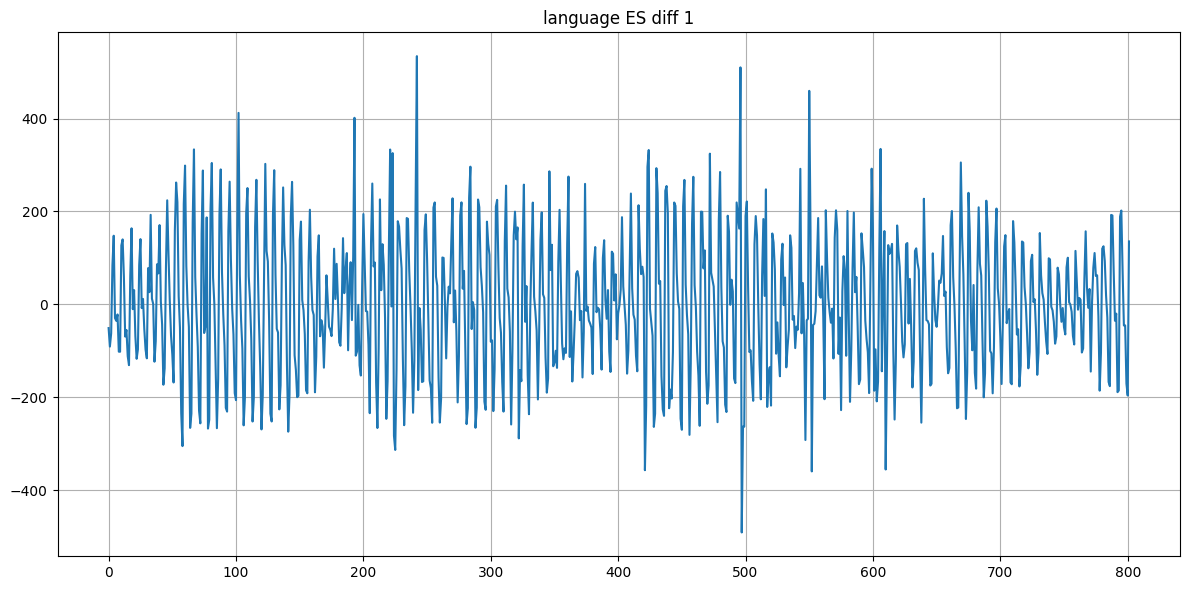

In [80]:
array_mean_lang = df_mean_lang.to_numpy()
array_diff_lang = array_mean_lang[1:] - array_mean_lang[:-1]

plt.figure(figsize=(12, 6))
plt.plot(array_diff_lang)
plt.title(f'language {language_select.upper()} diff 1')
plt.grid()
plt.tight_layout()
plt.show()

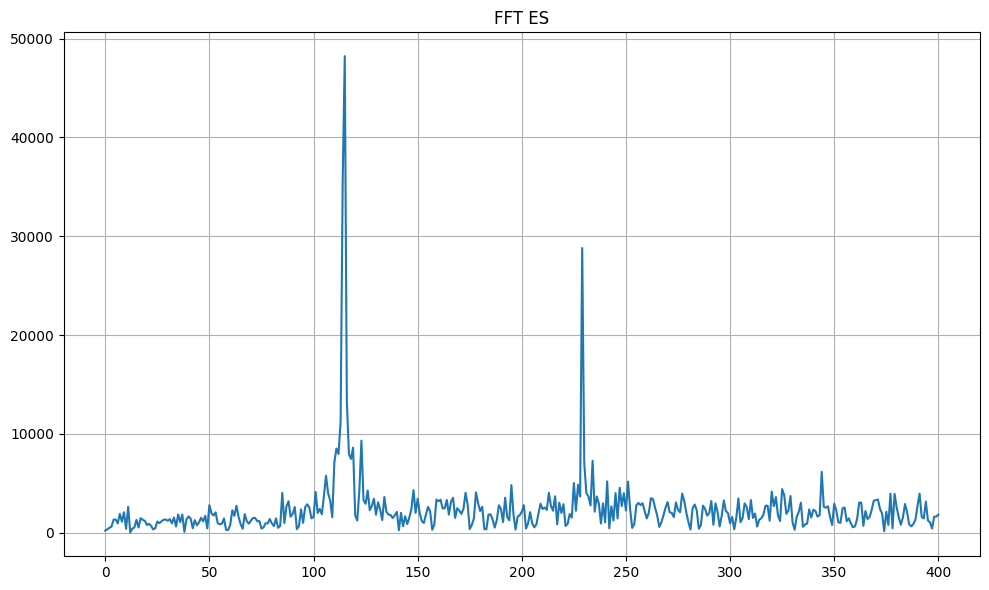

In [81]:
plt.figure(figsize=(10, 6))
yf = abs(scipy.fft.fft(array_diff_lang))
plt.plot(yf[:len(yf) // 2])
plt.title(f'FFT {language_select.upper()}')
plt.grid()
plt.tight_layout()
plt.show()

In [82]:
np.argsort(-yf[:len(yf) // 2])[:10]

array([115, 114, 229, 116, 113, 123, 119, 111, 117, 112])

# check device

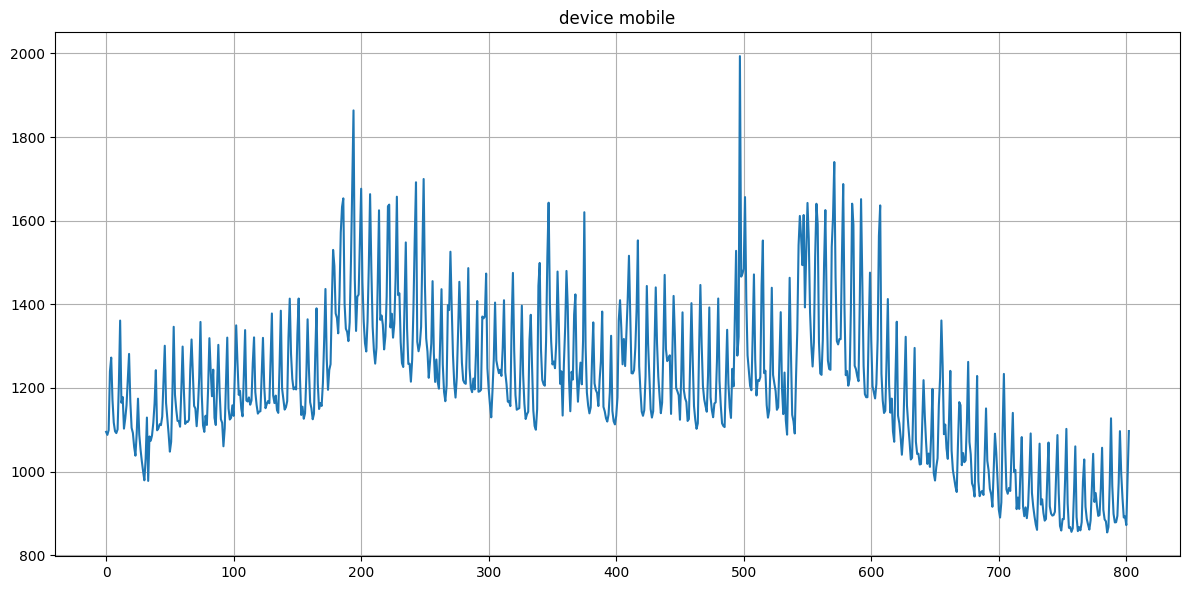

In [83]:
device_selected = 'mobile'
mask_device = df_train['device'].str.contains(device_selected)
time_col = miscel_tool.extract_time_column_name(df_train)
df_mean_device = df_train.loc[mask_device, time_col].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_mean_device .to_numpy())
plt.title(f"device {device_selected}")
plt.grid()
plt.tight_layout()
plt.show()

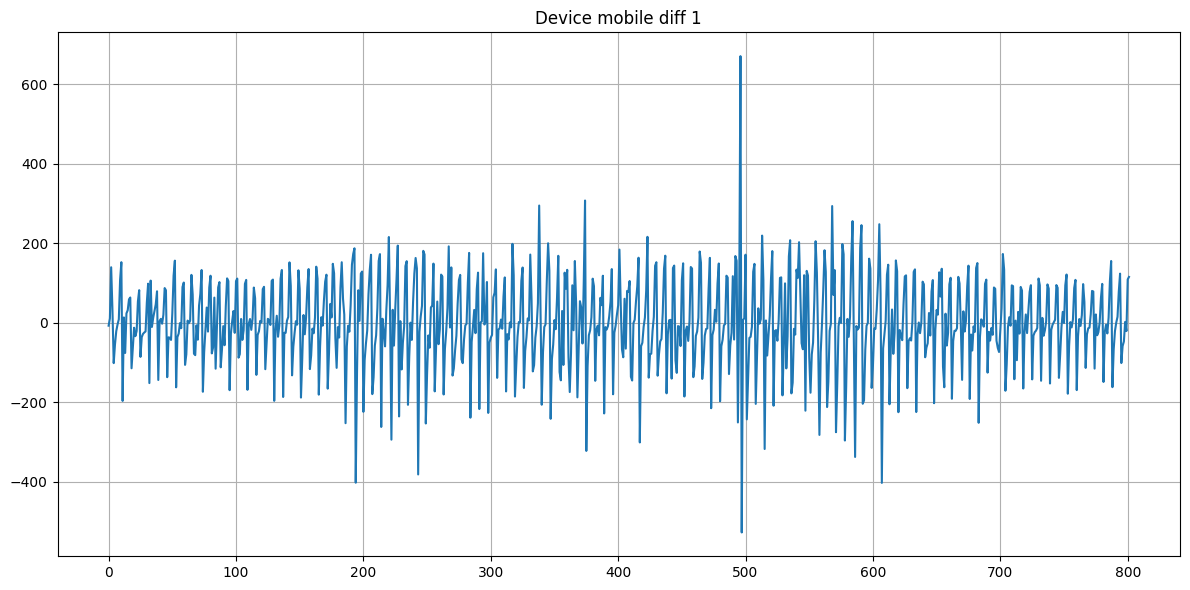

In [91]:
array_mean_device = df_mean_device.to_numpy()
array_diff_device = array_mean_device[1:] - array_mean_device[:-1]

plt.figure(figsize=(12, 6))
plt.plot(array_diff_device)
plt.title(f'Device {device_selected} diff 1')
plt.grid()
plt.tight_layout()
plt.show()

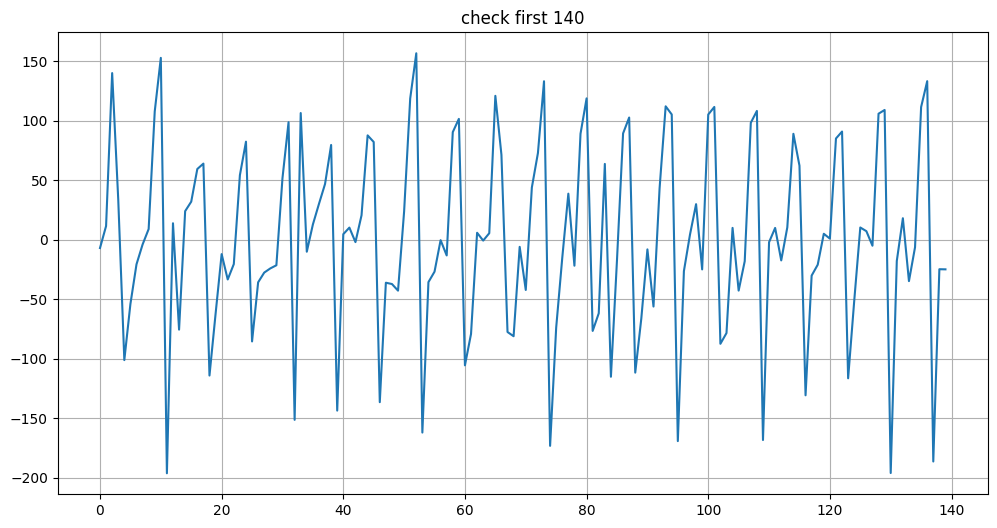

In [96]:
first_n = 7 * 20
plt.figure(figsize=(12, 6))
plt.plot(np.arange(first_n), array_diff_device[:first_n])
plt.title(f'check first {first_n}')
plt.grid()
plt.show()

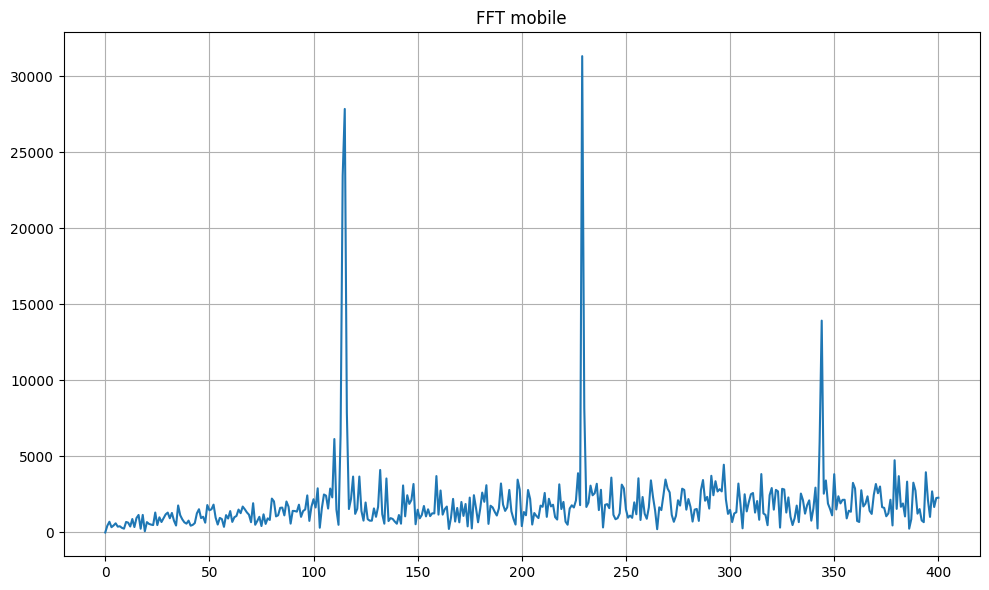

In [93]:
plt.figure(figsize=(10, 6))
yf = abs(scipy.fft.fft(array_diff_device))
plt.plot(yf[:len(yf) // 2])
plt.title(f'FFT {device_selected}')
plt.grid()
plt.tight_layout()
plt.show()